<a href="https://colab.research.google.com/github/yack97/Graficas-predictivas/blob/main/segunda_parte_manejo_de_arboles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#libreria arbol de deciciones
from sklearn import datasets #Libreria que imnporta diferente data sets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#libreria para trabajr con regiones 
from sklearn import neighbors
from mlxtend.plotting import plot_decision_regions

In [ ]:
data1 = pd.read_csv('ushape.csv')

In [ ]:
data1.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


<AxesSubplot:xlabel='X', ylabel='Y'>

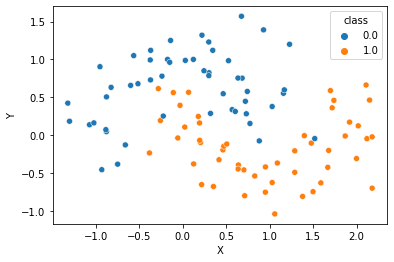

In [ ]:
sns.scatterplot(data = data1,
                x = 'X',
                y = 'Y',
                hue = 'class'
                )

In [ ]:
#Modelo
knn_model = neighbors.KNeighborsClassifier(n_neighbors = 1) # algoritmo
X = data1 [['X','Y']].values #variables independientes
target = data1['class'].astype(int).values # clase de prediccion al nuevo ingreso 
knn_model.fit(X,target)#modelo fit = ajuste, se le da dos valores (el equivalente a la variable independiente y laseccion del nuevo ingreso )

KNeighborsClassifier(n_neighbors=1)

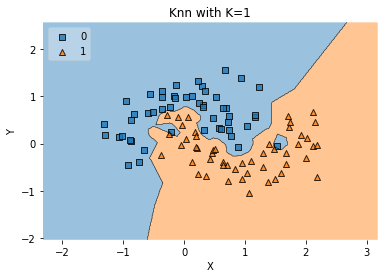

In [ ]:
#grafica de la region de desicion
plot_decision_regions(X, target, clf=knn_model, legend=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Knn with K=1')
plt.show()
#en la grafia inferior se expresan los nuevos ingresos en dos partes: azules o amarillos dando como opcion al indicativo mas cercano

In [ ]:
#ejemplo de funcion para repetir el analisis en referencia a diferentes valores en k
def knn_comparison (data, k): #funcion de comparacion
    x = data[['X', 'Y']].values #extracion de columnas
    y = data['class'].astype(int).values #clase y como int
    clf = neighbors.KNeighborsClassifier(n_neighbors = k) #algoritmo
    clf.fit(x, y)
    plot_decision_regions(x, y, clf=clf, legend = 2) #añadir anotaciones
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Knn with K='+ str(k))
    plt.show()
    

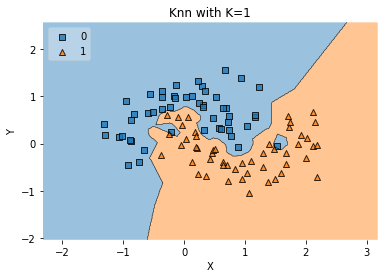

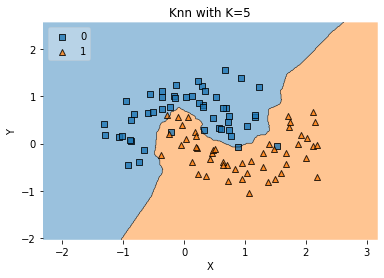

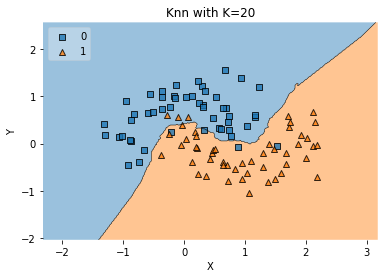

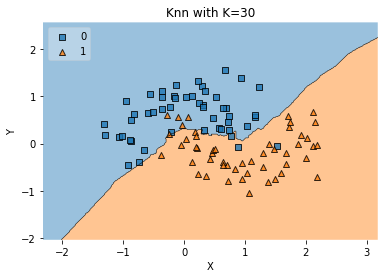

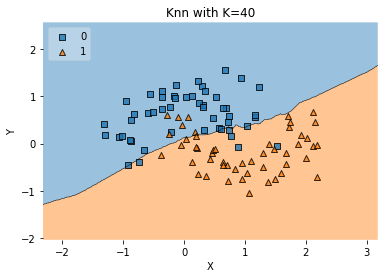

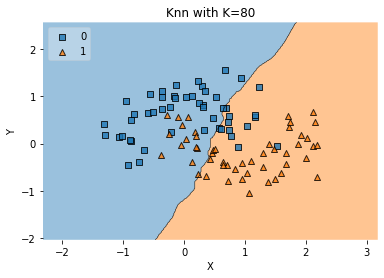

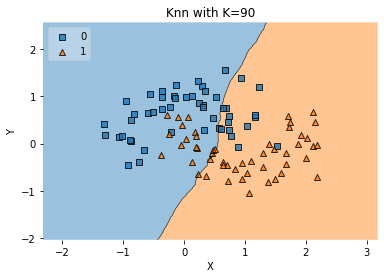

In [ ]:
# aplicar funcion
for i in [1,5,20,30,40,80, 90]: #para diferenciar valores de k (knn)
    knn_comparison(data1, i)
    #tener en cuenta el tema de un numero apropiado para la visualizacion con el tema de los sub ajustes

In [ ]:
#regresion logistica, su varianza es en tema de porcentaje
#determina si una variable independiente tiene tiene efecto sobre una variable dependiente binaria
#comprobar varias formas su porcentaje y tener en mente el objetivo del codigo

#librerias de regresion logistica

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score # mied la precicion del algoritmo
from sklearn.model_selection import train_test_split #divide los datos en conjuntos

In [ ]:
# carga de los datos
breast_cancer = datasets.load_breast_cancer() # Dictionary con datos y una varible target
data = pd.DataFrame(breast_cancer.data)
data.columns = breast_cancer.feature_names
target = pd.Series(breast_cancer.target)
data['breast_cancer_positive'] = target 

In [ ]:
data.shape

(569, 31)

In [ ]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,breast_cancer_positive
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
data.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,breast_cancer_positive
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
# separacion en train / test 
X_train, X_test, Y_train, Y_test = train_test_split(data[breast_cancer.feature_names], target)

In [ ]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
408,17.99,20.66,117.80,991.7,0.10360,0.13040,0.12010,0.08824,0.1992,0.06069,...,21.08,25.41,138.10,1349.0,0.1482,0.37350,0.3301,0.19740,0.3060,0.08503
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.1148,0.09866,0.1547,0.06575,0.3233,0.06165
479,16.25,19.51,109.80,815.8,0.10260,0.18930,0.22360,0.09194,0.2151,0.06578,...,17.39,23.05,122.10,939.7,0.1377,0.44620,0.5897,0.17750,0.3318,0.09136
476,14.20,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,0.06009,...,16.45,27.26,112.10,828.5,0.1153,0.34290,0.2512,0.13390,0.2534,0.07858
98,11.60,12.84,74.34,412.6,0.08983,0.07525,0.04196,0.03350,0.1620,0.06582,...,13.06,17.16,82.96,512.5,0.1431,0.18510,0.1922,0.08449,0.2772,0.08756


In [ ]:
X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.31,22.65,65.50,324.7,0.14820,0.4365,1.2520,0.17500,0.4228,0.11750
397,12.800,17.46,83.05,508.3,0.08044,0.08895,0.07390,0.04083,0.1574,0.05750,...,13.74,21.06,90.72,591.0,0.09534,0.1812,0.1901,0.08296,0.1988,0.07053
448,14.530,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.02925,0.1473,0.05746,...,16.30,28.39,108.10,830.5,0.10890,0.2649,0.3779,0.09594,0.2471,0.07463
131,15.460,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
385,14.600,23.29,93.97,664.7,0.08682,0.06636,0.08390,0.05271,0.1627,0.05416,...,15.79,31.71,102.20,758.2,0.13120,0.1581,0.2675,0.13590,0.2477,0.06836
